# Load Necessary Libraries

In [14]:
#!pip install pandas
#!pip install matplotlib
#!pip install sklearn
#!pip install keras
#!pip install tensorflow

  Using cached tensorflow-2.5.0-cp38-cp38-win_amd64.whl (422.6 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached absl_py-0.12.0-py3-none-any.whl (129 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached wrapt-1.12.1-py3-none-any.whl
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached grpcio-1.34.1-cp38-cp38-win_amd64.whl (2.9 MB)
  Using cached Markdown-3.3

In [15]:
#import pandas to handle dataset in easy to use table format
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#preprocessing package from sklearn will normalize data, making it easier for keras and model to learn
from sklearn import preprocessing
#train_test_split function for easy validation splits
#GridSearch will be used to select optimal parameters
from sklearn.model_selection import train_test_split, GridSearchCV
#import keras libraries to build model and manipulate layers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD

# Import Data

In [16]:
data = pd.read_csv('C:/Users/john3/OneDrive/Desktop/W&M/Capstone/Data/2017-2019_Airport_CreditCard_073020.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/john3/OneDrive/Desktop/W&M/Capstone/Data/2017-2019_Airport_CreditCard_073020.csv'

In [3]:
df = data

In [4]:
df['tip_percent'] = round(df['tip_amount']/df['fare_amount'],2) * 100

In [5]:
df = df.loc[df['tip_percent']<=100]

Text(23.076307040297813, 4392554.88, 'Mean: 20.98')

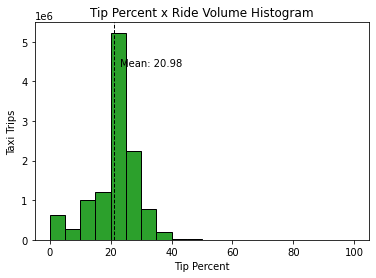

In [7]:
df['tip_percent'].hist(bins = 20, color='C2',edgecolor='k')
plt.xlabel('Tip Percent')
plt.ylabel('Taxi Trips')
plt.title('Tip Percent x Ride Volume Histogram')
plt.axvline(df['tip_percent'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.grid(False)

min_ylim, max_ylim = plt.ylim()
plt.text(df['tip_percent'].mean()*1.1, max_ylim*0.8, 'Mean: {:.2f}'.format(df['tip_percent'].mean()))

In [10]:
print(df.PU_Zone.unique())
print(df.DO_Borough.unique())
print(df.RatecodeID.unique())
df.columns.to_list

['Newark Airport' 'JFK Airport' 'LaGuardia Airport']
['EWR' 'Queens' 'Manhattan' 'Brooklyn' 'Staten Island' 'Bronx' 'Unknown']
[5 1 3 2 4 6 9]


<bound method IndexOpsMixin.tolist of Index(['tripID', 'pickup_datetime', 'dropoff_datetime', 'PULocationID',
       'PU_Borough', 'PU_Zone', 'PU_service_zone', 'DOLocationID',
       'DO_Borough', 'DO_Zone', 'DO_service_zone', 'trip_dur',
       'passenger_count', 'trip_distance', 'RatecodeID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'tip_percent', 'ehail_fee'],
      dtype='object')>

# Preprocess Data

In [8]:
#Conviert payment type into dummy variables with Pickup Zone
ccData = pd.get_dummies(df, columns=["PU_Zone","DO_Borough","RatecodeID"])

#ccData = ccData.loc[ccData['tip_percent']<=100] #remove outliers? Maybe not. Maybe high tippers have relevant influence on tip

#ccData = ccData.loc[ccData['trip_dur']>1] # a lot of these smaller trips could be insignificant

ccData.head()

tripID      pickup_datetime     dropoff_datetime  PULocationID PU_Borough  \
0       1  2019-10-06 12:02:13  2019-10-06 12:02:15             1        EWR   
1       2  2019-10-06 13:36:58  2019-10-06 13:37:23             1        EWR   
2       3  2019-10-06 14:38:05  2019-10-06 14:38:30             1        EWR   
3       4  2019-10-06 15:42:10  2019-10-06 15:42:19             1        EWR   
4       5  2019-10-06 15:08:44  2019-10-06 15:08:50             1        EWR   

  PU_service_zone  DOLocationID         DO_Zone DO_service_zone  trip_dur  \
0             EWR             1  Newark Airport             EWR       0.0   
1             EWR             1  Newark Airport             EWR       0.0   
2             EWR             1  Newark Airport             EWR       0.0   
3             EWR             1  Newark Airport             EWR       0.0   
4             EWR             1  Newark Airport             EWR       0.0   

   ...  DO_Borough_Queens  DO_Borough_Staten Island  DO_Borough_Unknown  \
0  ...                  0                         0                   0   
1  ...                  0                         0                   0   
2  ...                  0                         0                   0   
3  ...                  0                         0                   0   
4  ...                  0                         0                   0   

   RatecodeID_1  RatecodeID_2  RatecodeID_3  RatecodeID_4  RatecodeID_5  \
0             0             0             0             0             1   
1             0             0             0             0             1   
2             0             0             0             0             1   
3             0             0             0             0             1   
4             0             0             0             0             1   

   RatecodeID_6  RatecodeID_9  
0             0             0  
1             0             0  
2             0             0  
3             0             0  
4             0             0  

[5 rows x 40 columns]

In [12]:
ccData['pickup_datetime']

0           2019-10-06 12:02:13
1           2019-10-06 13:36:58
2           2019-10-06 14:38:05
3           2019-10-06 15:42:10
4           2019-10-06 15:08:44
                   ...         
11613209    2018-03-28 21:17:54
11613210    2018-09-22 09:14:00
11613211    2018-10-11 15:14:01
11613212    2019-01-23 19:22:31
11613213    2019-08-05 21:34:25
Name: pickup_datetime, Length: 11601995, dtype: object

### Add variables for Day of week, month and hour of day.

In [9]:
#convert date fields to datetime objects
ccData['pickup_datetime'] = pd.to_datetime(ccData.pickup_datetime)
ccData['dropoff_datetime'] = pd.to_datetime(ccData.dropoff_datetime)

ccData['pickup_datetime_doy'] = ccData['pickup_datetime'].dt.dayofyear
ccData['pickup_datetime_dow'] = ccData['pickup_datetime'].dt.dayofweek
ccData['pickup_datetime_month'] = ccData['pickup_datetime'].dt.month
ccData['pickup_datetime_hour'] = ccData['pickup_datetime'].dt.hour

ccData = pd.get_dummies(ccData, columns=['pickup_datetime_dow','pickup_datetime_month','pickup_datetime_hour'])

In [48]:
ccData.betCategory.value_counts()

bet      6258935
nobet    5343060
Name: betCategory, dtype: int64

In [50]:
6258935/11601995 

0.5394705824300045

# Bin tip percent

In [10]:
# condition = [(ccData['tip_percent'] >= 20) & (ccData['tip_percent'] <=25)]
# choices = [1,2,3]
# ccData['betCategory'] = np.select(conditions, choices)

conditions = [
    (ccData['tip_percent'] <= 10),
    (ccData['tip_percent'] >= 11) & (ccData['tip_percent'] <= 19),
    (ccData['tip_percent'] >= 20)
]
choices = [0,1,2]
ccData['tip_category3'] = np.select(conditions, choices)

conditions = [
    (ccData['tip_percent'] <= 10),
    (ccData['tip_percent'] >= 11) & (ccData['tip_percent'] <= 13),
    (ccData['tip_percent'] >= 14) & (ccData['tip_percent'] <= 16),
    (ccData['tip_percent'] >= 17) & (ccData['tip_percent'] <= 19),
    (ccData['tip_percent'] >= 20) & (ccData['tip_percent'] <= 22),
    (ccData['tip_percent'] >= 23) & (ccData['tip_percent'] <= 25),
    (ccData['tip_percent'] >= 26) & (ccData['tip_percent'] <= 28),
    (ccData['tip_percent'] > 30)]
choices = [0,1,2,3,4,5,6,7]
ccData['tip_category8'] = np.select(conditions, choices)

conditions = [
    (ccData['tip_percent'] <= 10),
    (ccData['tip_percent'] >= 11) & (ccData['tip_percent'] <= 15),
    (ccData['tip_percent'] >= 16) & (ccData['tip_percent'] <= 20),
    (ccData['tip_percent'] >= 21) & (ccData['tip_percent'] <= 25),
    (ccData['tip_percent'] > 25)]
choices = [0,1,2,3,4]
ccData['tip_category5'] = np.select(conditions, choices)

conditions = [
    (ccData['tip_percent'] <= 10),
    (ccData['tip_percent'] >= 11) & (ccData['tip_percent'] <= 15),
    (ccData['tip_percent'] >= 16) & (ccData['tip_percent'] <= 20),
    (ccData['tip_percent'] > 20)]
choices = [0,1,2,3]
ccData['tip_category4'] = np.select(conditions, choices)

In [41]:
len(ccData['betCategory'].str.count('bet'))

11601995

# Correlation Heatmaps for all of our variables.


None of the varible have a strong correlation to tip_percent. Our model features will rely on intuition and trial and error.

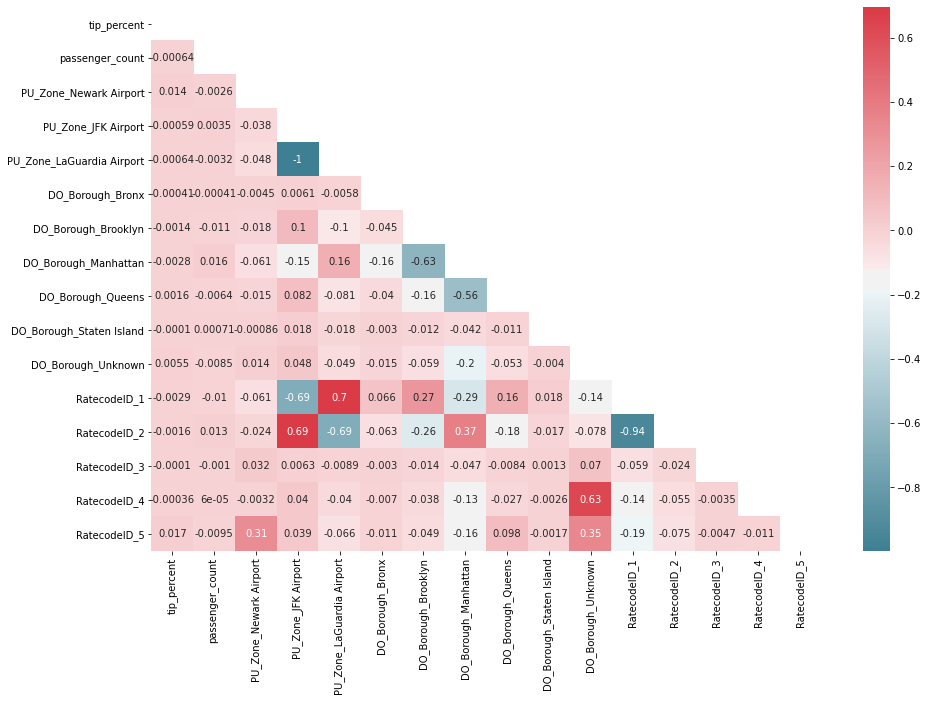

In [39]:
from matplotlib import pyplot as plt
import seaborn as sns

#create figure for heatmap plot
plt.figure(figsize = (15,10)) # width x height
#create correlation matrix with data
#drop variables with low correlation scores. 
#ccData = ccData.drop(["tripID","PULocationID","ehail_fee","LocationID","extra","improvement_surcharge"], axis=1)

ccDataCorr = ccData[['tip_percent','passenger_count',
            'PU_Zone_Newark Airport','PU_Zone_JFK Airport','PU_Zone_LaGuardia Airport',
            'DO_Borough_Bronx','DO_Borough_Brooklyn','DO_Borough_Manhattan','DO_Borough_Queens','DO_Borough_Staten Island','DO_Borough_Unknown',
            'RatecodeID_1','RatecodeID_2','RatecodeID_3','RatecodeID_4','RatecodeID_5']]

corr = ccDataCorr.corr()
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# use heatmatp function to visualize correlations
corrHeatmap = sns.heatmap(corr, mask= mask, cmap=cmap,annot=True)

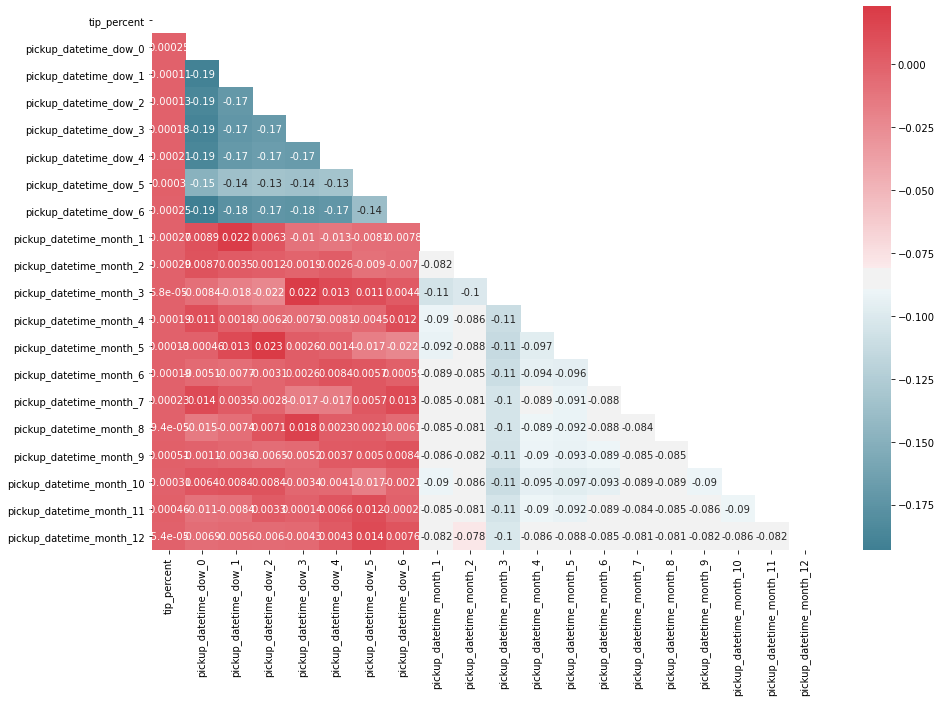

In [41]:
#create figure for heatmap plot
plt.figure(figsize = (15,10)) # width x height
ccDataCorr = ccData[['tip_percent','pickup_datetime_dow_0', 'pickup_datetime_dow_1',
       'pickup_datetime_dow_2', 'pickup_datetime_dow_3',
       'pickup_datetime_dow_4', 'pickup_datetime_dow_5',
       'pickup_datetime_dow_6', 'pickup_datetime_month_1',
       'pickup_datetime_month_2', 'pickup_datetime_month_3',
       'pickup_datetime_month_4', 'pickup_datetime_month_5',
       'pickup_datetime_month_6', 'pickup_datetime_month_7',
       'pickup_datetime_month_8', 'pickup_datetime_month_9',
       'pickup_datetime_month_10', 'pickup_datetime_month_11',
       'pickup_datetime_month_12']]

corr = ccDataCorr.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
corrHeatmap = sns.heatmap(corr, mask= mask, cmap=cmap,annot=True)

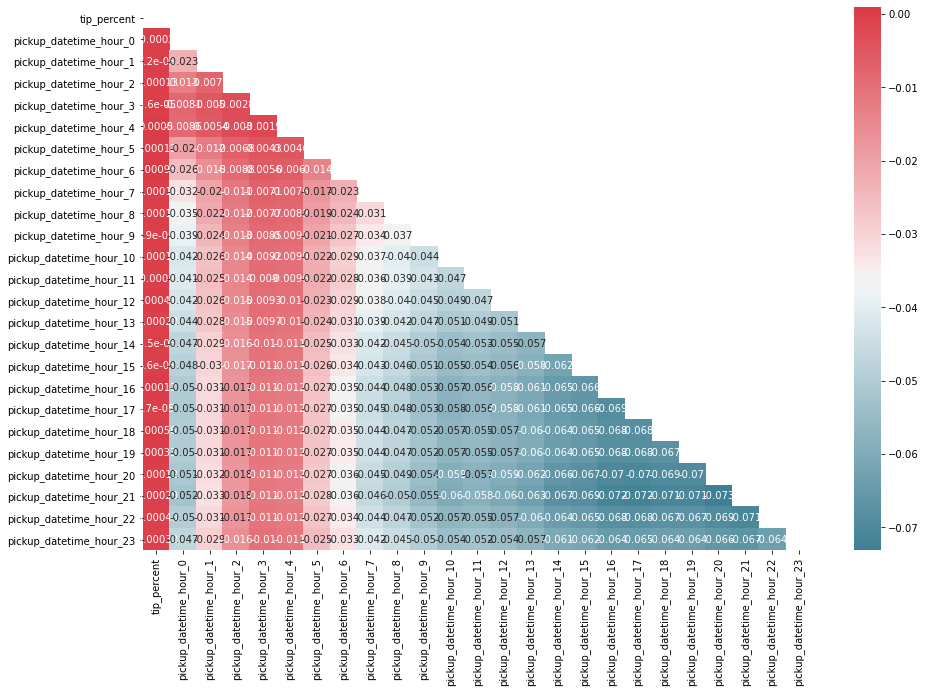

In [43]:
#create figure for heatmap plot
plt.figure(figsize = (15,10)) # width x height
#create correlation matrix with data
#drop variables with low correlation scores. 
#ccData = ccData.drop(["tripID","PULocationID","ehail_fee","LocationID","extra","improvement_surcharge"], axis=1)

ccDataCorr = ccData[['tip_percent','pickup_datetime_hour_0',
       'pickup_datetime_hour_1', 'pickup_datetime_hour_2',
       'pickup_datetime_hour_3', 'pickup_datetime_hour_4',
       'pickup_datetime_hour_5', 'pickup_datetime_hour_6',
       'pickup_datetime_hour_7', 'pickup_datetime_hour_8',
       'pickup_datetime_hour_9', 'pickup_datetime_hour_10',
       'pickup_datetime_hour_11', 'pickup_datetime_hour_12',
       'pickup_datetime_hour_13', 'pickup_datetime_hour_14',
       'pickup_datetime_hour_15', 'pickup_datetime_hour_16',
       'pickup_datetime_hour_17', 'pickup_datetime_hour_18',
       'pickup_datetime_hour_19', 'pickup_datetime_hour_20',
       'pickup_datetime_hour_21', 'pickup_datetime_hour_22',
       'pickup_datetime_hour_23']]

corr = ccDataCorr.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# use heatmatp function to visualize correlations
corrHeatmap = sns.heatmap(corr, mask= mask, cmap=cmap,annot=True)

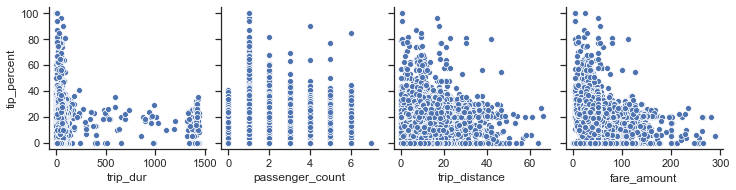

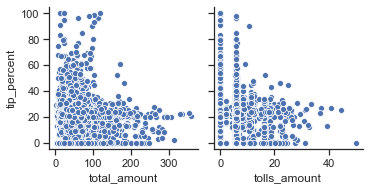

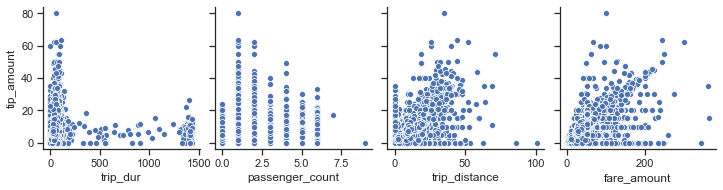

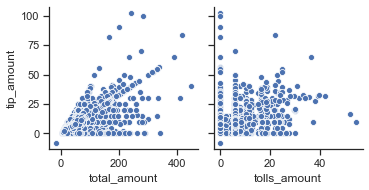

In [73]:
features1 = ['trip_dur','passenger_count','trip_distance','fare_amount']
features2 = ['total_amount','tolls_amount']
#features3 = []
sns.set(style="ticks", color_codes=True)
sns.pairplot(ccData.sample(50000), x_vars=features1, y_vars='tip_percent')
sns.pairplot(ccData.sample(50000), x_vars=features2, y_vars='tip_percent')
#sns.pairplot(ccData.sample(50000), x_vars=features3, y_vars='tip_percent')

sns.pairplot(ccData.sample(50000), x_vars=features1, y_vars='tip_amount')
sns.pairplot(ccData.sample(50000), x_vars=features2, y_vars='tip_amount')
#sns.pairplot(ccData.sample(50000), x_vars=features3, y_vars='tip_amount')

# Define Variables

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

The function scale provides a quick and easy way to perform this operation on a single array-like dataset:

In [11]:
from keras.utils import to_categorical
#create scaler function that will compress data to reduce varaibilty between features
min_max_scaler = preprocessing.MinMaxScaler()

#isolate dependant variable
Y = ccData['tip_category4'].values # categorical data
y = to_categorical(Y)
#First model will use all features except dependant variable and gameID
X = ccData[['passenger_count', 
            'PU_Zone_JFK Airport',
            'PU_Zone_LaGuardia Airport',
            'DO_Borough_Bronx',
            'DO_Borough_Brooklyn',
            'DO_Borough_Manhattan',
            'DO_Borough_Queens',
            'DO_Borough_Staten Island',
            'DO_Borough_Unknown',
            'RatecodeID_2',
            'RatecodeID_3',
            'RatecodeID_4',
            'RatecodeID_5']].values

#use min max function to transform data
X = min_max_scaler.fit_transform(X)

#use train_test_split function to separate data for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)

# Define ANN Model

## This NN is used to predict a tip percent category.

tip_percent <= 10

tip_percent >= 11 & <=15,

tip_percent >= 16 & <= 20),

tip_percent > 20



which activation function?
https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8

In [12]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
Define Model
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
def build_model():
    model = Sequential() 
    model.add(Dense(20,input_dim=13,activation='relu')) 
    model.add(Dense(10))
    model.add(Dense(13))
    #model.add(Dense(100))
    model.add(Dense(4, activation='softmax'))
    optimizer = SGD(lr=.01)
    model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['categorical_accuracy'])
    return model

# Train Model

In [13]:
import datetime
start_time = datetime.datetime.now()
seed = 100
np.random.seed(seed)
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
Train Model
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
epochs = 10
batch_size = 512

model = build_model()
history = model.fit(X_train,y_train,epochs=epochs, batch_size=batch_size,verbose=1, validation_data=(X_test,y_test))    

end_time = datetime.datetime.now()
print("Model traning time: ", end_time-start_time)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 9281596 samples, validate on 2320399 samples
Epoch 1/10
9281596/9281596 [==============================] - 65s 7us/step - loss: 0.9791 - categorical_accuracy: 0.6508 - val_loss: 0.9773 - val_categorical_accuracy: 0.6514
Epoch 2/10
9281596/9281596 [==============================] - 66s 7us/step - loss: 0.9783 - categorical_accuracy: 0.6510 - val_loss: 0.9773 - val_categorical_accuracy: 0.6514
Epoch 3/10
9281596/9281596 [==============================] - 67s 7us/step - loss: 0.9782 - categorical_accuracy: 0.6510 - val_loss: 0.9773 - val_categorical_accuracy: 0.6514
Epoch 4/10
9281596/9281596 [==============================] - 67s 7us/step - loss: 0.9781 - categorical_accuracy: 0.6510 - val_loss: 0.9772 - val_categorical_accuracy: 0.6514
Epoch 5/10
9281596/9281596 [==============================] - 68s 7us/step - loss: 0.9781 - categorical_accuracy: 0.6510 - val_loss: 0.9770 - val_

Text(0.5, 1.0, 'NN Model Results')

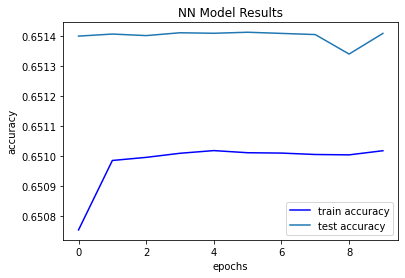

In [27]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
Plot model
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
plt.figure()
plt.plot(history.history['categorical_accuracy'], color='blue', label='train accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='test accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.title("NN Model Results")

# Paremeter Tuning

First Attempt:
epochs = 3
drop = [.1,.2,.3,.4,.5,.8]
batch_size = 512
l=[(10,20,10)]
"Fitting 3 folds for each of 6 candidates, totalling 18 fits"


In [93]:
def build_model(layers):
    model=Sequential()
    model.add(Activation('softmax'))
    for i,nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=13))
            model.add(Activation('softmax'))
        else:
            model.add(Dense(nodes))
            model.add(Dropout(.1))
    #optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['acc']) 
    return model

start_time = datetime.datetime.now()
epochs = 3
#drop = [.1,.5]
batch_size = 512
model = KerasClassifier(build_fn=build_model,epochs=epochs,batch_size=batch_size)
 
#learn_rate = [ 0.01, 0.1, 0.2, 0.3]
#momentum = [0.0, 0.2,0.8, 0.9]
l=[(20,10,13)]
param_grid = dict(layers=l)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=0,cv=2) #CV!!
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
Train Model Section
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
grid_result = grid.fit(X_train, y_train)
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
Show output Section
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
# print out results
print("The best accuracy is: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):    
    print("%f (%f) with: %r" % (mean, stdev, param))
    
stop_time = datetime.datetime.now()
print("Time required for training:",stop_time - start_time)

Epoch 1/3
4640870/4640870 [==============================] - 32s 7us/step - loss: 0.9917 - acc: 0.6488
Epoch 2/3
4640870/4640870 [==============================] - 32s 7us/step - loss: 0.9823 - acc: 0.6494
Epoch 3/3
4640870/4640870 [==============================] - 11s 2us/step
Epoch 1/3
4640870/4640870 [==============================] - 38s 8us/step - loss: 0.9919 - acc: 0.6488
Epoch 2/3
4640870/4640870 [==============================] - 37s 8us/step - loss: 0.9829 - acc: 0.6494
Epoch 3/3
4640870/4640870 [==============================] - 11s 2us/step
Epoch 1/3
9281740/9281740 [==============================] - 69s 7us/step - loss: 0.9876 - acc: 0.6488
Epoch 2/3
9281740/9281740 [==============================] - 69s 7us/step - loss: 0.9811 - acc: 0.6492
Epoch 3/3
9281740/9281740 [==============================] - 70s 7us/step - loss: 0.9808 - acc: 0.6493
The best accuracy is: 0.650129 using {'layers': (20, 10, 13)}
0.650129 (0.000126) with: {'layers': (20, 10, 13)}
Time required for 

In [16]:
# pred_train = model.predict(X_train)
# scores = model.evaluate(X_train, Y_train, verbose = 1)

# pred_test = model.predict(X_test)
# scores2 = model.evaluate(X_test, Y_test, verbose = 1)

In [17]:
# print('Accuracy on training data: {}% \nError on traning data: {}%'.format(scores[1], 1 - scores[1]))
# print('\nAccuracy on test data: {}% \nError on test data: {}%'.format(scores2[1], 1 - scores[1]))

# Build Logistic Regrssion Model

https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

[[1955304 2051864]
 [ 704674 3989655]]
Accuracy: 0.6832110612691127


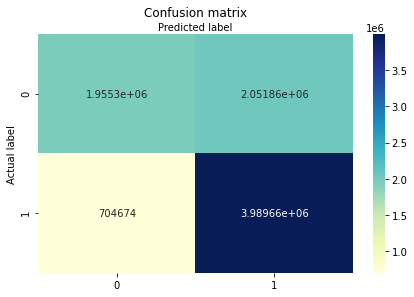

In [14]:
conditions = [ (ccData['tip_percent'] <= 21) , 
              (ccData['tip_percent'] > 21) ]
choices = [0,1]
ccData['tip_category2'] = np.select(conditions, choices)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

ccData = ccData.fillna(0) # for only numerical data being used

#min_max_scaler = preprocessing.MinMaxScaler()

Xnames = ccData[['passenger_count', 
            'PU_Zone_JFK Airport',
            'PU_Zone_LaGuardia Airport',
            'DO_Borough_Bronx',
            'DO_Borough_Brooklyn',
            'DO_Borough_Manhattan',
            'DO_Borough_Queens',
            'DO_Borough_Staten Island',
            'DO_Borough_Unknown']].values
            #'RatecodeID_2.0',
            #'RatecodeID_3.0',
            #'RatecodeID_4.0',
            #'RatecodeID_5.0']].values

#X = min_max_scaler.fit_transform(Xnames)
X = Xnames


y = ccData[['tip_category2']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.75)

logreg = LogisticRegression(max_iter = 7600)
model = logreg.fit(X_train, y_train.ravel())

y_pred=logreg.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Logistic Regression Results

## Accuracy: .67

# Model tries to predict weather a tip is higher or lower than 20% 

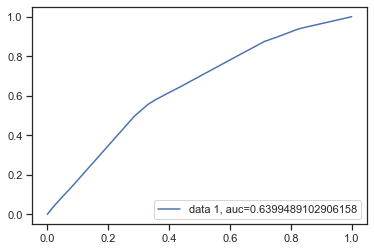

In [81]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()